<a href="https://colab.research.google.com/github/elzains/Catalens-Capstone-Project/blob/main/Skripsi_Catalens_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SKRIPSI CATALENS 2024**

Nama : Zainal Arifin<br>
Email : zafinsalsyaf@gmail.com<br>

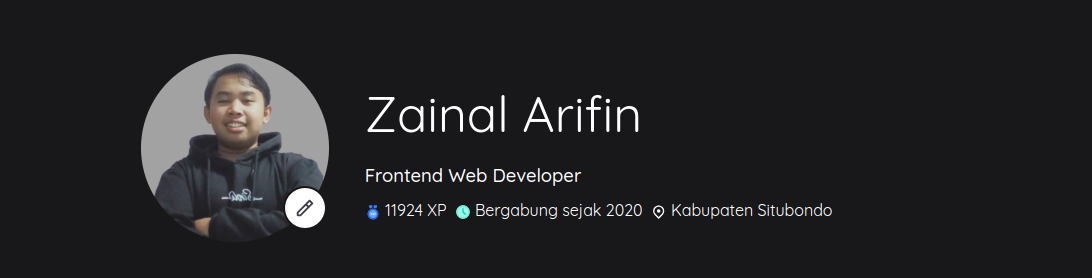



**1.  Import Library TensorFlow, Keras dan Masukkan Dataset**



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

tf.__version__

'2.15.0'

In [ ]:
!wget http://47.245.118.30/data/catalens.zip

--2024-05-30 02:27:12--  http://47.245.118.30/data/catalens.zip
Connecting to 47.245.118.30:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352421699 (336M) [application/zip]
Saving to: ‘catalens.zip’

catalens.zip        100%[===================>] 336.09M   144KB/s    in 41m 44s 

2024-05-30 03:08:56 (137 KB/s) - ‘catalens.zip’ saved [352421699/352421699]




**2.   Setup dan Import Library**



In [ ]:
!pip install split_folders

In [ ]:
import zipfile,os
import splitfolders
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
from google.colab import files
from keras.preprocessing import image

**3. Memisahkan Data Train dan Validasi**

In [ ]:
local_zip = 'catalens.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('bigdata')
zip_ref.close()

splitfolders.ratio('bigdata/catalens', output="catalens/data", seed=1337, ratio=(.6, .4))

data_dir = 'catalens/data'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

Copying files: 3000 files [00:01, 2367.19 files/s]


In [ ]:
print('Cataract Train Set 60% =', len(os.listdir('catalens/data/train/cataract')))
print('Glaucoma Train Set 60% =', len(os.listdir('catalens/data/train/glaucoma')))
print('Normal Train Set 60% =', len(os.listdir('catalens/data/train/normal')))

Cataract Train Set 60% = 600
Glaucoma Train Set 60% = 600
Normal Train Set 60% = 600


In [ ]:
print('Cataract Valid Set 40% =', len(os.listdir('catalens/data/val/cataract')))
print('Glaucoma Valid Set 40% =', len(os.listdir('catalens/data/val/glaucoma')))
print('Normal Valid Set 40% =', len(os.listdir('catalens/data/val/normal')))

Cataract Valid Set 40% = 400
Glaucoma Valid Set 40% = 400
Normal Valid Set 40% = 400


In [ ]:
train_cataract_dir = os.path.join(train_dir, 'cataract')
train_glaucoma_dir = os.path.join(train_dir, 'glaucoma')
train_normal_dir = os.path.join(train_dir, 'normal')

validation_cataract_dir = os.path.join(validation_dir, 'cataract')
validation_glaucoma_dir = os.path.join(validation_dir, 'glaucoma')
validation_normal_dir = os.path.join(validation_dir, 'normal')

In [ ]:
cataract_imgs = os.listdir(train_cataract_dir)
glaucoma_imgs = os.listdir(train_glaucoma_dir)
normal_imgs = os.listdir(train_normal_dir)

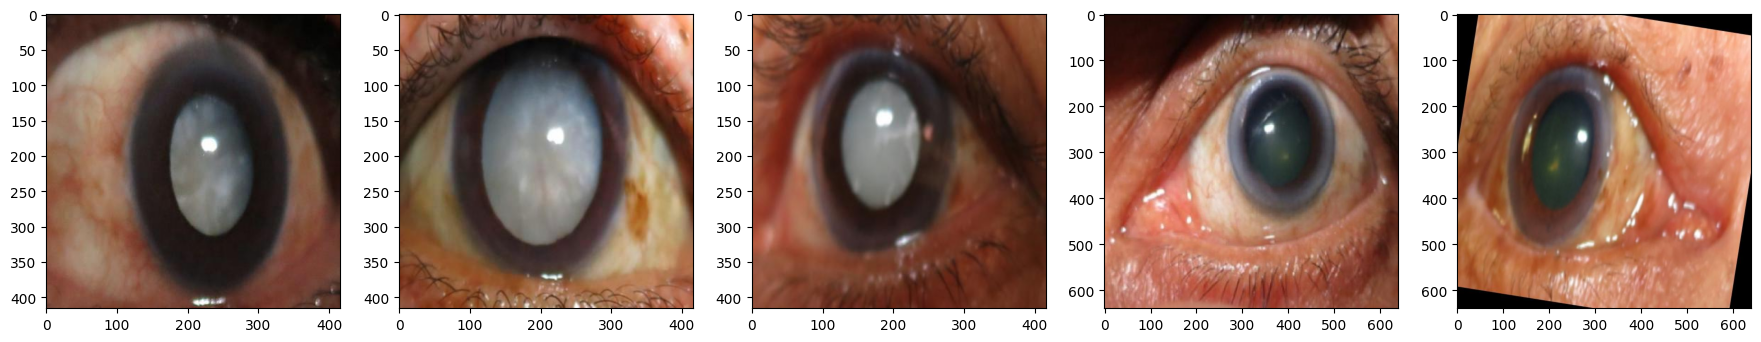

In [ ]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(cataract_imgs[:5]):
  sp = plt.subplot(1, 5, i+1)
  img = mpimg.imread(os.path.join(train_cataract_dir, img_path))
  plt.imshow(img)
plt.show()

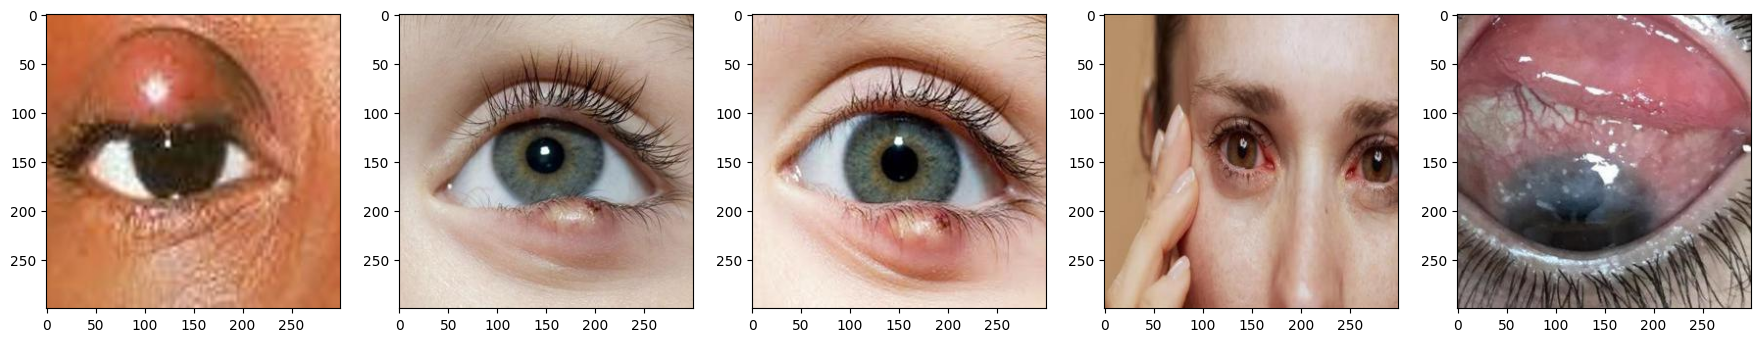

In [ ]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(glaucoma_imgs[:5]):
  sp = plt.subplot(1, 5, i+1)
  img = mpimg.imread(os.path.join(train_glaucoma_dir, img_path))
  plt.imshow(img)
plt.show()

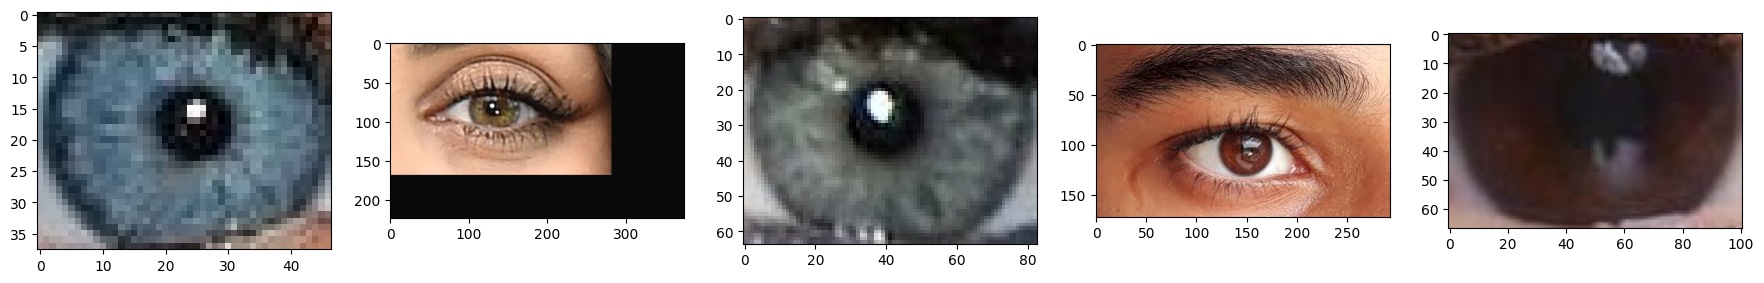

In [ ]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(normal_imgs[:5]):
  sp = plt.subplot(1, 5, i+1)
  img = mpimg.imread(os.path.join(train_normal_dir, img_path))
  plt.imshow(img)
plt.show()

**4. Augmentasi Gambar**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.9999,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.9999
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

valid_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
)

Found 1800 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'cataract': 0, 'glaucoma': 1, 'normal': 2}

In [ ]:
valid_generator.class_indices

{'cataract': 0, 'glaucoma': 1, 'normal': 2}

**5. Melatih sebuah model Convolutional Neural Network**

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 49, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)        0

**6. Kompilasi Model & Alur Pelatihan**

In [ ]:
model.compile(
    optimizer = 'RMSprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=100,
    validation_data=valid_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/100
25/25 - 17s - loss: 1.1396 - accuracy: 0.3625 - val_loss: 1.0926 - val_accuracy: 0.3625 - 17s/epoch - 700ms/step
Epoch 2/100
25/25 - 14s - loss: 1.0731 - accuracy: 0.4446 - val_loss: 1.0708 - val_accuracy: 0.3938 - 14s/epoch - 577ms/step
Epoch 3/100
25/25 - 14s - loss: 0.9799 - accuracy: 0.5263 - val_loss: 0.8638 - val_accuracy: 0.7000 - 14s/epoch - 570ms/step
Epoch 4/100
25/25 - 15s - loss: 0.7476 - accuracy: 0.6538 - val_loss: 0.8927 - val_accuracy: 0.6125 - 15s/epoch - 608ms/step
Epoch 5/100
25/25 - 15s - loss: 0.6360 - accuracy: 0.7320 - val_loss: 0.5169 - val_accuracy: 0.8125 - 15s/epoch - 585ms/step
Epoch 6/100
25/25 - 14s - loss: 0.5934 - accuracy: 0.7325 - val_loss: 0.4927 - val_accuracy: 0.8000 - 14s/epoch - 564ms/step
Epoch 7/100
25/25 - 14s - loss: 0.5772 - accuracy: 0.7575 - val_loss: 0.6082 - val_accuracy: 0.7125 - 14s/epoch - 561ms/step
Epoch 8/100
25/25 - 13s - loss: 0.5289 - accuracy: 0.7688 - val_loss: 0.4251 - val_accuracy: 0.8375 - 13s/epoch - 503ms/step


**7. Evaluasi Model**

In [ ]:
score = model.evaluate(train_generator)

print('Loss:', round(score[0] * 100, 2), '%')
print('Accuracy:', round(score[1] * 100, 2), '%')

57/57 [==============================] - 18s 309ms/step - loss: 0.0444 - accuracy: 0.9867
Loss: 4.44 %
Accuracy: 98.67 %


In [ ]:
score = model.evaluate(valid_generator)

print('Loss:', round(score[0] * 100, 2), '%')
print('Accuracy:', round(score[1] * 100, 2), '%')

38/38 [==============================] - 8s 204ms/step - loss: 0.3066 - accuracy: 0.9250
Loss: 30.66 %
Accuracy: 92.5 %


In [ ]:
tf.saved_model.save(model, "RPS_SAVED_MODEL")

**8. Plot Kurva Data Latih dan Validasi**

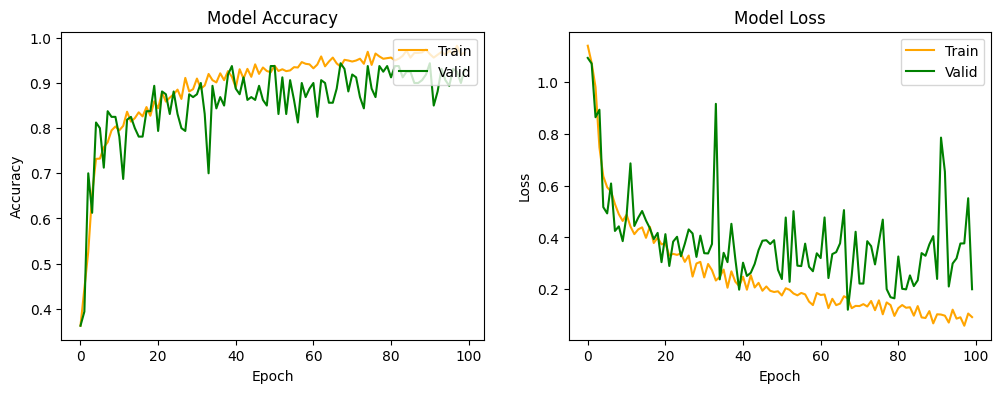

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, color='orange')
plt.plot(val_acc, color='green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(loss, color='orange')
plt.plot(val_loss, color='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

**9. Memprediksi Model Data yang ada dengan Upload Gambar**

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():


  path = fn
  img = tf.keras.utils.load_img(path, target_size=(100,100))

  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(fn)
  if classes[0,0] == 0.0:
   print('>>> Gambar ini termasuk Cataract')
  elif classes[0,1] == 1.0:
   print('>>> Gambar ini termasuk Glaucoma')
  else :
   print('>>> Gambar ini termasuk Normal')